### Introductie

Met behulp van visualisaties ga ik het volgende proberen aan te tonen over de airbnb listings in Amsterdam:

- Of de locatie/wijk waarin een airbnb zich bevindt invloed heeft op de prijs.

- Of er een correlatie is tussen de prijs en het aantal reviews van een airbnb.

Deze informatie kan handig zijn voor iemand die overweegt een airbnb te huren in Amsterdam, en op zoek is naar een redelijke prijs.

Gemiddelde prijs per neighbourhood_cleansed


Correlatie tussen aantal reviews en prijs

### Aanpak

Eerst ga ik kijken naar alle kolommen die mogelijk relevant zijn voor het onderzoek. Ik ga kijken of deze kolommen waarden missen en/of uitschieters hebben. Als een relevante kolom veel missende waarden heeft zal ik hier een oplossing voor bedenken en toepassen. Als een relevante kolom (extreme) uitschieters bevat zal ik deze uit de dataset droppen.

### Relevante kolommen

Eerst laad ik de dataset in, en kijk ik naar de kolomnamen en een paar rijen data. Ik kies de kolommen die mogelijk bruikbaar zijn voor het onderzoek:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)

In [60]:
airbnb = pd.read_csv("../databronnen/listings.csv.gz")

selectie_kolommen = ['id', 'listing_url', 'name',
       'description', 'host_id',
       'host_name', 'host_since', 
       'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed','latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights',  'has_availability',
       'availability_30', 'number_of_reviews',
       'number_of_reviews_ltm', 
       'review_scores_rating', 'license']

airbnb = airbnb[selectie_kolommen]

airbnb.head()

,id,listing_url,name,description,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,number_of_reviews,number_of_reviews_ltm,review_scores_rating,license
0,27886,https://www.airbnb.com/rooms/27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,Flip,2010-03-23,t,1.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,1.5,1.0,1.0,"[""Coffee maker: Nespresso"", ""Shampoo"", ""Paid s...",$132.00,3,356,t,0,302,28,4.92,0363 974D 4986 7411 88D8
1,28871,https://www.airbnb.com/rooms/28871,Comfortable double room,Basic bedroom in the center of Amsterdam.,124245,Edwin,2010-05-13,t,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$78.00,2,730,t,1,710,93,4.88,0363 607B EA74 0BD8 2F6F
2,29051,https://www.airbnb.com/rooms/29051,Comfortable single / double room,This room can also be rented as a single or a ...,124245,Edwin,2010-05-13,t,2.0,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.36584,4.89111,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Carbon monoxide alarm"", ""Wifi"", ""Heating"", ""...",$70.00,2,730,t,0,822,86,4.81,0363 607B EA74 0BD8 2F6F
3,44391,https://www.airbnb.com/rooms/44391,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,194779,Jan,2010-08-08,f,1.0,t,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,52.37168,4.91471,Entire rental unit,Entire home/apt,4,NaN,2.0,NaN,"[""Shampoo"", ""Essentials"", ""Dishwasher"", ""Paid ...",NaN,3,730,t,0,42,0,4.71,0363 E76E F06A C1DD 172C
4,47061,https://www.airbnb.com/rooms/47061,Charming apartment in old centre,"A beautiful, quiet apartment in the center of ...",211696,Ivar,2010-08-24,f,1.0,t,NaN,De Baarsjes - Oud-West,52.36786,4.87458,Entire rental unit,Entire home/apt,3,1.5,2.0,2.0,"[""Shampoo"", ""Paid street parking off premises""...",$120.00,2,20,t,1,203,5,4.77,0363 1266 8C04 4133 E6AC


De kolommen die ik voor het onderzoek gekozen heb zijn de volgende:  
- neighbourhood (de plek waar de airbnb zich bevindt)
- neighbourhood_cleansed (de wijk waarin de airbnb zich bevindt, preciezer dan neighbourhood)
- price (prijs per nacht)
- number_of_reviews (aantal reviews)

### Missende waarden

Ik ga nu onderzoeken of er missende waarden zijn in deze kolommen.





In [61]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10168 non-null  int64  
 1   listing_url             10168 non-null  object 
 2   name                    10168 non-null  object 
 3   description             9859 non-null   object 
 4   host_id                 10168 non-null  int64  
 5   host_name               10164 non-null  object 
 6   host_since              10164 non-null  object 
 7   host_is_superhost       10069 non-null  object 
 8   host_listings_count     10164 non-null  float64
 9   host_identity_verified  10164 non-null  object 
 10  neighbourhood           5258 non-null   object 
 11  neighbourhood_cleansed  10168 non-null  object 
 12  latitude                10168 non-null  float64
 13  longitude               10168 non-null  float64
 14  property_type           10168 non-null

-neighbourhood  
De kolom mist 4910 waarden, wat behoorlijk veel is. Als ik deze kolom wil gebruiken is het geen goed idee om de missende waarden aan te vullen met bijvoorbeeld de modus, omdat dit de onderzoeksresultaten aanzienlijk zal vertekenen. Het zou beter zijn om de percentages van elke categorie te berekenen en de missende waarden met deze verdeling op te vullen.

-neighbourhood_cleansed  
Deze kolom mist geen waarden, en kan direct gebruikt worden.

-price  
Deze kolom mist 3847 waarden. Een rede hiervoor zou kunnen zijn dat de prijs variabel is, afhankelijk van bijvoorbeeld de vakantieperiode's. Ik kies ervoor om alle rijen met een missende waarde weg te gooien. Dit is een aanzienlijk deel van de data, maar ik denk dat 6321 rijen meer dan genoeg is om goede conclusies te kunnen trekken, en op deze manier hoef ik de missende waarden niet aan te vullen en blijft de data zo betrouwbaar mogelijk.

-number_of_reviews  
Deze kolom mist ook geen waarden, en kan direct gebruikt worden

Ik heb besloten om de kolom 'neighbourhood' niet te gebruiken. 'neighbourhood_cleansed' is een veel betere kolom, omdat deze geen missende waarden heeft en de locatie preciezer aangeeft dan 'neighbourhood'.

### Outliers

Voor de numerieke kolommen 'price' en 'number_of_reviews' is het belangrijk om te kijken of er uitschieters zijn. Dit doe ik met behulp van boxplots.

De price kolom bevat nu nog strings met een dollar-teken voor de prijs. Ik ga eerst het dollar-teken verwijderen en de waarden omzetten naar floats, zodat er mee gerekend kan worden.

In [62]:
airbnb['price_numeric'] = airbnb['price'].str.replace('$','').str.replace(',','').astype(float)

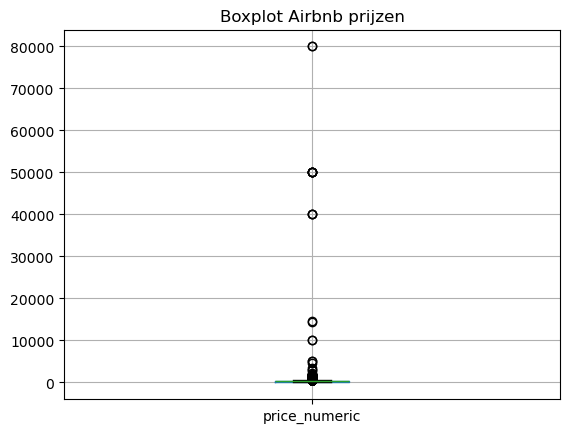

In [63]:
airbnb.boxplot(["price_numeric"])
plt.title("Boxplot Airbnb prijzen")
plt.show()

Zoals te zien is, zijn er een paar extreme uitschieters die de data vertekenen. Het zou goed kunnen dat deze hoge prijzen verkeerd ingevuld zijn. Ik ga deze uitschieters uit data verwijderen door te filteren op een prijs lager dan 8000:

In [64]:
airbnb = airbnb[airbnb["price_numeric"] < 8000]

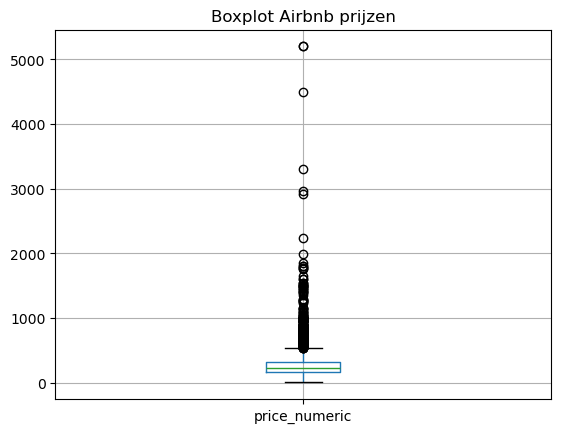

In [65]:
airbnb.boxplot(["price_numeric"])
plt.title("Boxplot Airbnb prijzen")
plt.show()

Er zijn nog best veel datapunten die (ver) boven de box uitkomen, maar deze prijzen zijn op zich te geloven omdat Amsterdam een populaire toeristische stad is, en er veel dure panden staan.

Voor de 'number_of_reviews' kolom maak ik ook een boxplot:

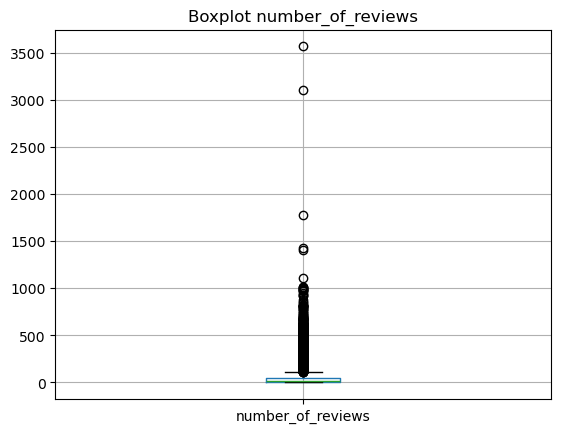

In [66]:
airbnb.boxplot(["number_of_reviews"])
plt.title("Boxplot number_of_reviews")
plt.show()

Ook hier zijn een paar uitschieters te zien. Een mogelijke verklaring zou kunnen zijn dat de host gesjoemeld heeft, en zelf reviews heeft achtergelaten op zijn/haar airbnb. Dit is echter niet zeker. Ik kies ervoor om de grootste uitschieters te verwijderen door te filteren op een aantal reviews lager dan 2000:

In [67]:
airbnb = airbnb[airbnb["number_of_reviews"] < 2000]

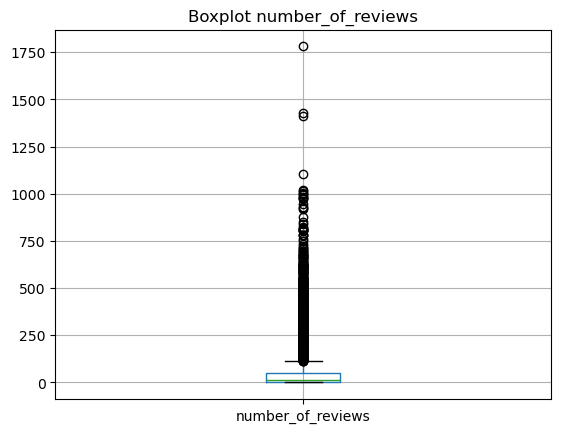

In [68]:
airbnb.boxplot(["number_of_reviews"])
plt.title("Boxplot number_of_reviews")
plt.show()

Ook voor deze kolom zijn er nog best veel datapunten die (ver) buiten de box liggen. Ik vind dat deze datapunten nog wel betrouwbaar genoeg zijn om erin te laten. Airbnb bestaat al 17 jaar, wat het realistisch maakt dat sommige airbnb's meer dan 1000 reviews hebben.

### Visualisatie 1

Met deze barplot probeer ik te laten zien of er verschil in gemiddelde prijs zit tussen wijken:

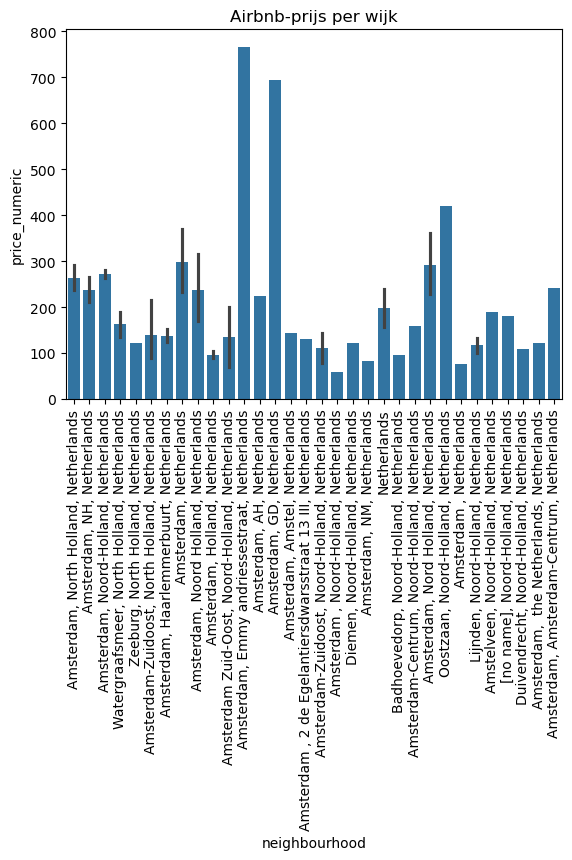

In [ ]:
ax = sns.barplot(x="neighbourhood", y="price_numeric", data=airbnb)
plt.xticks(rotation=90)
plt.title("Gemiddelde Airbnb-prijs per wijk")
plt.show()

Het valt op dat er best een grote spreiding in gemiddelde prijs zit tussen verschillende wijken. Zo kost een airbnb in de goedkoopste wijk gemiddeld rond de 50 euro per nacht, en in de duurste wijk ongeveer 775 euro per nacht.

Conclusie: De wijk waarin een airbnb staat heeft zeker invloed op de vraagprijs.

### Visualisatie 2

Met deze scatterplot probeer ik aan te tonen of er een verband is tussen het aantal reviews en de prijs van een airbnb:

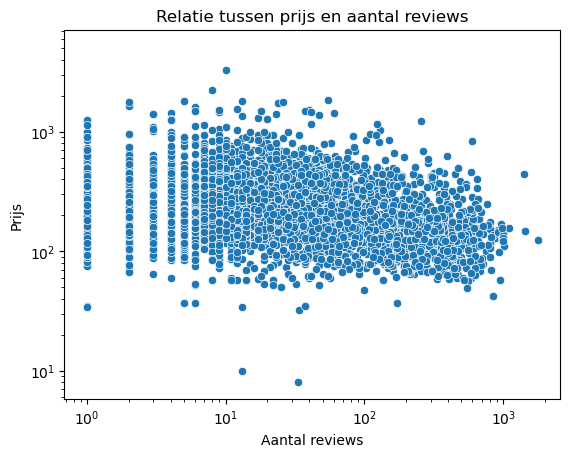

In [98]:
sns.scatterplot(x="number_of_reviews", y="price_numeric", data=airbnb)
plt.xscale("log")   # optioneel, als er hele grote uitschieters zijn
plt.yscale("log")   # idem
plt.xlabel("Aantal reviews")
plt.ylabel("Prijs")
plt.title("Relatie tussen prijs en aantal reviews")
plt.show()

Het valt op dat er verticale lijnen met datapunten in de plot verschijnen. Dit komt doordat ik een logaritmische schaal gebruik op de x-as.

Conclusie: Er is geen duidelijk verband te zien tussen het aantal reviews en de prijs van een airbnb. Het lijkt erop dat de prijs iets zakt naarmate het aantal reviews stijgt, maar ik vind dat deze trend niet duidelijk genoeg is om er conclusies uit te trekken.